In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)

# Let's do some machine learning!

First we'll import some data. I'm using the famous Panoma dataset from the Kansas Geological Survey, and loading [a version](https://github.com/scienxlab/datasets/tree/main/kgs) from my own collection.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/scienxlab/datasets/main/kgs/panoma-training-data.csv')

df.head()

,Well Name,Depth,Formation,RelPos,Marine,GR,ILD,DeltaPHI,PHIND,PE,Facies,LATITUDE,LONGITUDE,ILD_log10,Lithology,RHOB,Mineralogy,Siliciclastic
0,SHRIMPLIN,851.3064,A1 SH,1.000,1,77.45,4.613176,9.9,11.915,4.6,3.0,37.978076,-100.987305,0.664,siltstone,2393.499945,siliciclastic,True
1,SHRIMPLIN,851.4588,A1 SH,0.979,1,78.26,4.581419,14.2,12.565,4.1,3.0,37.978076,-100.987305,0.661,siltstone,2416.119814,siliciclastic,True
2,SHRIMPLIN,851.6112,A1 SH,0.957,1,79.05,4.549881,14.8,13.050,3.6,3.0,37.978076,-100.987305,0.658,siltstone,2404.576056,siliciclastic,True
3,SHRIMPLIN,851.7636,A1 SH,0.936,1,86.10,4.518559,13.9,13.115,3.5,3.0,37.978076,-100.987305,0.655,siltstone,2393.249071,siliciclastic,True
4,SHRIMPLIN,851.9160,A1 SH,0.915,1,74.58,4.436086,13.5,13.300,3.4,3.0,37.978076,-100.987305,0.647,siltstone,2382.602601,siliciclastic,True


Add a column of Gaussian noise, a completely spurious feature, to make a point later on.

In [3]:
rng = np.random.default_rng(42)

df['Noise'] = rng.normal(size=len(df))

## Make features and target

We're going to predict lithology from well logs..

In [4]:
features = ['GR', 'RHOB', 'PE', 'Noise']
target = 'Lithology'

In [5]:
df[target].value_counts()

Lithology
siltstone     1586
limestone      737
wackestone     628
mudstone       543
sandstone      282
dolomite       190
Name: count, dtype: int64

## Split train and test

What kind of data do we have?

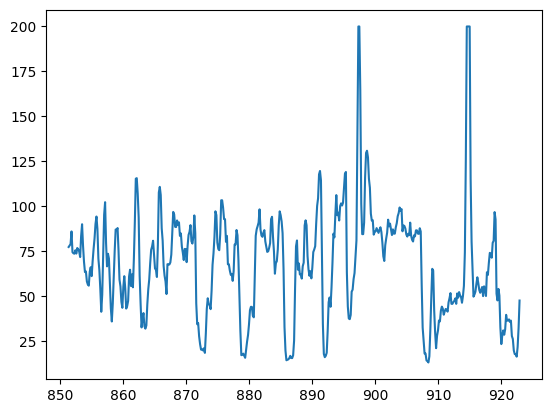

In [8]:
shrimplin = df['Well Name'] == 'SHRIMPLIN'

plt.plot(df.loc[shrimplin, 'Depth'], df.loc[shrimplin, 'GR'])

So we split by well.

In [7]:
test_wells = ['CRAWFORD', 'STUART']

test_flag = df['Well Name'].isin(test_wells)

X_test = df.loc[test_flag, features]
y_test = df.loc[test_flag, target]
X_train = df.loc[~test_flag, features]
y_train = df.loc[~test_flag, target]

In [ ]:
X_train.describe()

In [ ]:
sns.pairplot(df, x_vars=features, y_vars=features, hue='Lithology')

In [ ]:
X_train['RHOB'].hist(bins=100)

Analyse a DataFrame? Make a report? Make a dashboard?

## 🚩 `redflag` is here!

In [ ]:
import redflag as rf
from importlib.metadata import version

version('redflag')

## 🚩 `redflag` has functions

In [ ]:
rf.is_clipped(X_train['RHOB'])

In [ ]:
rf.is_imbalanced(y_train)

In [ ]:
rf.imbalance_degree(y_train)

In [ ]:
rf.minority_classes(y_train)

## 🚩 `redflag` has DataFrame accessors

In [ ]:
y_train.redflag.minority_classes()

In [ ]:
df.redflag.correlation_detector(features)

In [ ]:
df.redflag.feature_importances(features, target)

## 🚩 `redflag` has a pipeline

In [ ]:
model = RandomForestClassifier()

pipe = make_pipeline(
    StandardScaler(),  # Standardize.
    rf.pipeline,       # 🚩 special pipeline.
    model              # The learning algo.
)

pipe

In [ ]:
pipe = pipe.fit(X_train, y_train)

The `redflag` pipeline **does not transform anything** and merely passes data through.

The pipeline still functions as normal.

In [ ]:
y_pred = pipe.predict(X_test)

In [ ]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(X_train.iloc[:, 2], kde=True, lw=0, ax=axs[0])
sns.histplot(X_test.iloc[:, 2], kde=True, lw=0, ax=axs[1])
axs[1].set_xlim(axs[0].get_xlim())

---

&copy; 2024 Matt Hall, licensed CC BY